In [1]:
import seaborn as sbn
import os
import cooler
import matplotlib.pyplot as plt
import numpy as np
import cooltools
import matplotlib.colors as cl
import pandas as pd
import warnings
import bbi
import matplotlib.patches as patches
from NGS import HiCTools as HT
import matplotlib

# Supress warnings
log10(0) happens a lot

In [2]:
warnings.simplefilter("ignore")

# Set matplotlib pdf style

In [3]:
matplotlib.rcParams['pdf.fonttype'] = 42

# Set Wd

In [4]:
os.chdir("/groups/gerlich/experiments/Experiments_004700/004727/Sequencing_data/cooler/")

# Define colormap

In [5]:
cmapFall = cl.LinearSegmentedColormap.from_list("fall", colors=["white", "orange" ,"red", "black"], N=256)

# Define cooler filehandle for prometaphase sample

In [26]:
BINSIZE = 500000

clrs = {interType:
        cooler.Cooler(
            f'Prometaphase.{interType}.1000.mcool::/resolutions/{BINSIZE}')
        for interType in ["cis", "trans", "all"]
        }

# Chromosome 1 long arm

In [27]:
coord = "chr1:160000000-249000000"

In [28]:
allExamp = clrs["all"].matrix(balance=True).fetch(coord)
cisExamp = clrs["cis"].matrix(balance=True).fetch(coord)
transExamp = clrs["trans"].matrix(
    balance=True).fetch(coord)

## Plot

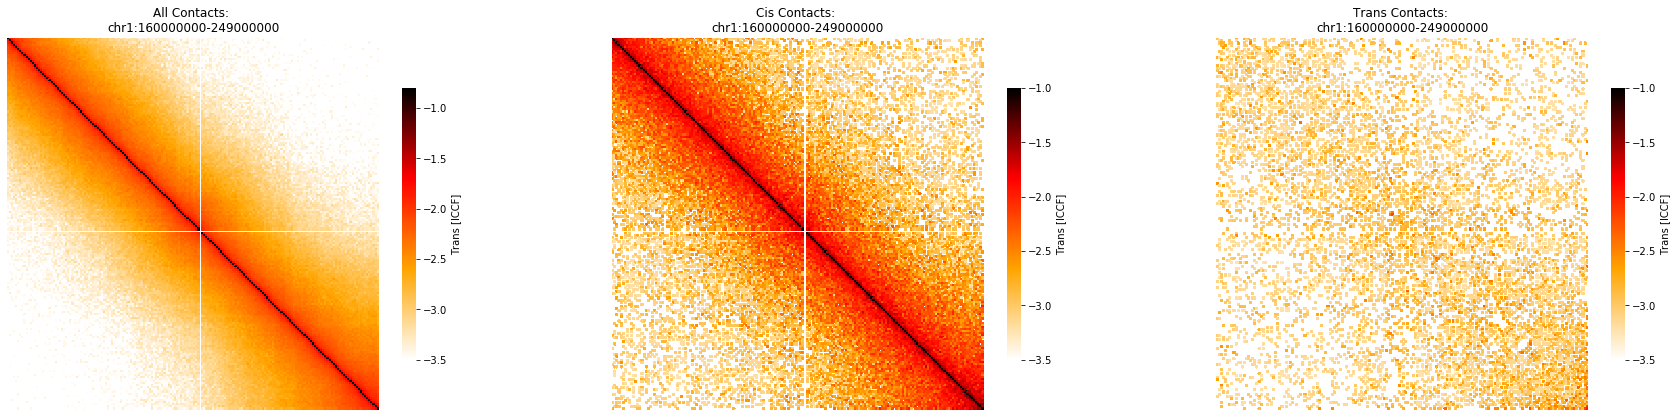

In [29]:
f, ax = plt.subplots(1, 3)
plt.subplots_adjust(wspace=0.3)
sbn.heatmap(np.log10(allExamp), cmap=cmapFall, ax=ax[0], vmin=-3.5, vmax=-0.8,
            square=True,
            xticklabels=False,
            yticklabels=False,
            rasterized=True,
            cbar_kws={"shrink": 0.5, "label": "Trans [ICCF]"})
sbn.heatmap(np.log10(cisExamp), cmap=cmapFall, ax=ax[1],  vmin=-3.5, vmax=-1,
            square=True,
            xticklabels=False,
            yticklabels=False,
            rasterized=True,
            cbar_kws={"shrink": 0.5, "label": "Trans [ICCF]"})
sbn.heatmap(np.log10(transExamp), cmap=cmapFall, ax=ax[2],  vmin=-3.5, vmax=-1,
            square=True,
            xticklabels=False,
            yticklabels=False,
            rasterized=True,
            cbar_kws={"shrink": 0.5, "label": "Trans [ICCF]"})
ax[0].set_title(f"All Contacts: \n{coord}")
ax[1].set_title(f"Cis Contacts: \n{coord}")
ax[2].set_title(f"Trans Contacts: \n{coord}")
f.set_size_inches(30, 10)
plt.show()

## Write to file

In [63]:
resultdir = "/groups/gerlich/experiments/Experiments_004700/004727/Results/Examples"
f.savefig(os.path.join(resultdir, "Chr1_long_arm_500kb_prometaphase_fall.png"), bbox_inches="tight")
f.savefig(os.path.join(resultdir, "Chr1_long_arm_500kb_prometapahse_fall.pdf"), bbox_inches="tight")